### Import all the things

In [130]:
## all imports
from IPython.display import HTML
import numpy as np
import urllib.request
import urllib.error
import bs4 #this is beautiful soup
import time
import operator
import socket
import _pickle
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

from secret import *
from pypac import PACSession
session = PACSession()
import csv
import io
import statsmodels.api as sm

### Read the Requirements Data

In [131]:
# assign column names for each CSV
r_cols = ['desc_frameFam', 'id_frame', 'id_project', 'id_req', 'id_baseReq', 'id_tparent', 'date_contractStart', 
          'date_issueFMI', 'desc_projectState' ]

req = pd.read_csv(
    'C:/Users/502689880/GE Projects/Lead_Times/requirements.csv',
    names=r_cols)

req.head()

,desc_frameFam,id_frame,id_project,id_req,id_baseReq,id_tparent,date_contractStart,date_issueFMI,desc_projectState
0,209C-7,209C-7,F6724G8,FK1G,FK1G,367A6724G008,11/29/2012,11/4/2013,Complete
1,209C-7,209C-7,F6724G8,FK1S,FK1S,367A6724G008,11/29/2012,11/4/2013,Complete
2,3/2A-K,32F,F7373G1,FK8X,FK8X,367A7373G001,7/15/2014,11/13/2014,Complete
3,3/2A-K,32J,F6774G3,FS2T,FS2T,367A6774G003,9/8/2014,6/24/2015,Complete
4,3/2A-K,32J,F6774G3,FS2Y,FS2Y,367A6774G003,9/8/2014,6/24/2015,Complete


### Read the Lead Time data

In [132]:
# assign column names for each CSV
l_cols = ['id_partL1', 'num_level', 'id_tparent', 'desc_uom', 'id_task', 'desc_status', 'id_part', 'num_totLead', 'num_dimLead', 
          'num_inv', 'num_postProdLead', 'num_preProdLead', 'num_procLead', 'num_itemMatCost', 'num_stockInd', 'num_onHand', 
          'num_resQty', 'num_transQty', 'num_bomQty', 'num_poCost', 'num_poQty', 'num_itemCost', 'num_onHand', 'num_onHandInv', 
          'num_openPOsTot', 'num_openSOsTot', 'num_soQty', 'num_soUnitCost', 'num_venLead', 'num_venPOQty', 'num_venPOPrice' ]

lt = pd.read_csv(
    'C:/Users/502689880/GE Projects/Lead_Times/ltData.csv',
    names=l_cols)

lt.head()

,id_partL1,num_level,id_tparent,desc_uom,id_task,desc_status,id_part,num_totLead,num_dimLead,num_inv,...,num_itemCost,num_onHand.1,num_onHandInv,num_openPOsTot,num_openSOsTot,num_soQty,num_soUnitCost,num_venLead,num_venPOQty,num_venPOPrice
0,143E7165G001,4,367A6377G007,EA (each),0010,Superceded,X0006AAX0Y0BA030-0X,108.571429,0.0,0.0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,143E7165G001,4,367A6377G007,EA (each),0010,Superceded,X0005A0M0BA050-0J,110.000000,0.0,0.0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,143E7165G001,4,367A6377G007,EA (each),0010,Superceded,X0005A0M0BA060-0J,53.371429,0.0,0.0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,144E7446G001,4,367A6571G001,EA (each),0010,Superceded,X0005CAG0BA020-0D,108.571429,0.0,0.0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,144E7446G001,4,367A6571G001,EA (each),0010,Superceded,X0005CAG0BA020-0E,108.571429,0.0,0.0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0


### Get information about data

In [133]:
print (req.dtypes)
print ()
print (req.describe())

desc_frameFam         object
id_frame              object
id_project            object
id_req                object
id_baseReq            object
id_tparent            object
date_contractStart    object
date_issueFMI         object
desc_projectState     object
dtype: object

       desc_frameFam id_frame id_project id_req id_baseReq    id_tparent  \
count           8144     8144       8144   8144       8144          7395   
unique            21       51       2843    416        357          2612   
top            7/1FA   7FA.03   F7360G12   FT7J       FT7J  367A6843G005   
freq            2790     1967         32    575        575            32   

       date_contractStart date_issueFMI desc_projectState  
count                7045          7045              7045  
unique               1088           967                 5  
top             9/19/2014     2/28/2017          Complete  
freq                   44            55              5262  


In [134]:
print (lt.dtypes)
print ()
print (lt.describe())

id_partL1            object
num_level             int64
id_tparent           object
desc_uom             object
id_task              object
desc_status          object
id_part              object
num_totLead         float64
num_dimLead         float64
num_inv             float64
num_postProdLead    float64
num_preProdLead     float64
num_procLead        float64
num_itemMatCost     float64
num_stockInd          int64
num_onHand          float64
num_resQty          float64
num_transQty        float64
num_bomQty          float64
num_poCost          float64
num_poQty           float64
num_itemCost        float64
num_onHand.1        float64
num_onHandInv         int64
num_openPOsTot        int64
num_openSOsTot        int64
num_soQty           float64
num_soUnitCost      float64
num_venLead         float64
num_venPOQty        float64
num_venPOPrice      float64
dtype: object

           num_level    num_totLead    num_dimLead       num_inv  \
count  159910.000000  159910.000000  159910.00000

### Merge and Subset data frames

1) Merge with inner join

1) Subset data by
    
    id_tparent
    desc_projectState
    id_req
    id_baseReq
    id_frame
    desc_frameFam
    id_task
    id_partL1
    desc_status
    num_stockInd
    num_totLead
    date_contractStart
    date_issueFMI

In [136]:
lead = pd.merge(req, lt, on='id_tparent', how='inner')

#lead_subset = ['id_tparent', 'desc_projectState', 'id_req', 'id_baseReq', 'id_frame', 'desc_frameFam', 'id_task', 'id_partL1', 
#                'desc_status', 'num_stockInd', 'num_totLead', 'date_contractStart', 'date_issueFMI']
#lead = lead[lead_subset]

print (lead.head())

  desc_frameFam id_frame id_project id_req id_baseReq    id_tparent  \
0        3/2A-K      32F    F7373G1   FK8X       FK8X  367A7373G001   
1        3/2A-K      32F    F7373G1   FK8X       FK8X  367A7373G001   
2        3/2A-K      32F    F7373G1   FK8X       FK8X  367A7373G001   
3        3/2A-K      32F    F7373G1   FK8X       FK8X  367A7373G001   
4        3/2A-K      32F    F7373G1   FK8X       FK8X  367A7373G001   

  date_contractStart date_issueFMI desc_projectState      id_partL1  \
0          7/15/2014    11/13/2014          Complete  114T6270G0001   
1          7/15/2014    11/13/2014          Complete  114T6270G0001   
2          7/15/2014    11/13/2014          Complete  114T6270G0001   
3          7/15/2014    11/13/2014          Complete  114T6270G0001   
4          7/15/2014    11/13/2014          Complete  114T6270G0001   

        ...        num_itemCost num_onHand.1 num_onHandInv num_openPOsTot  \
0       ...                 0.0          0.0             0           

### Filtering Data

Select `id_task`s **0500** and higher `AND` `id_task`s **0104** and **0106** `AND` all `id_task`s that begin with a letter except for **A010** and **A210**

We will accomplish this with a .txt file listing all relevant MLIs

`MLIs_with_parts.txt`

In [137]:
text_file = open("C:/Users/502689880/GE Projects/Lead_Times/MLIs_with_parts.txt", "r")
MLI_list = text_file.read().split(',')
print (MLI_list)
print (len(MLI_list))
text_file.close()

lead = lead[lead['id_task'].isin(MLI_list)]
lead.id_task

['0104', '0106', '0501', '0503', '0507', '0508', '0509', '0510', '0511', '0512', '0513', '0514', '0515', '0516', '0525', '0531', '0533', '0538', '0543', '0544', '0546', '0548', '0557', '0559', '0564', '0566', '0567', '0570', '0572', '0574', '0575', '0581', '0585', '0601', '0602', '0603', '0604', '0605', '0606', '0607', '0608', '0611', '0612', '0613', '0623', '0628', '0637', '0638', '0639', '0641', '0645', '0650', '0701', '0702', '0703', '0705', '0706', '0710', '0712', '0715', '0717', '0719', '0722', '0726', '0796', '0797', '0798', '0799', '0801', '0802', '0804', '0805', '0811', '0812', '0813', '0815', '0901', '0903', '0904', '0905', '0906', '0907', '0908', '0909', '0910', '0911', '0914', '0915', '0917', '0918', '0919', '0920', '0922', '0923', '0924', '0926', '0929', '0931', '0932', '0940', '0941', '0953', '0956', '0961', '0962', '0963', '0964', '0965', '0968', '0969', '0972', '0973', '0974', '0976', '0979', '0980', '0982', '0983', '0984', '0987', '0990', '0991', '0992', '0996', '1003',

1          0710
6          0104
9          0510
16         0503
38         1302
39         1302
40         1308
41         1308
42         0706
43         0705
44         0705
47         1302
48         1302
49         1308
50         1308
51         0706
52         0705
53         0705
56         1302
57         1302
58         1308
59         1308
60         0706
61         0705
62         0705
65         1302
66         1302
67         1308
68         1308
69         0706
           ... 
1005098    1402
1005099    0798
1005100    0798
1005101    1333
1005102    1333
1005103    1409
1005104    1409
1005105    1334
1005106    1334
1005132    1331
1005133    1331
1005134    1410
1005135    0796
1005136    0796
1005142    1401
1005143    1401
1005144    0797
1005145    0797
1005146    1332
1005147    1332
1005148    1402
1005149    1402
1005150    0798
1005151    0798
1005152    1333
1005153    1333
1005154    1409
1005155    1409
1005156    1334
1005157    1334
Name: id_task, Length: 3

### More Filters

Filter `desc_projectState` for `== Complete`

Filter `desc_status` for `== Active & Pre-Active`

Filter `num_stockInd` for ` == 0`

Filter `date_contractStart` for past 2 years

In [138]:
lead = lead[lead['desc_projectState'] == 'Complete']
print (lead.desc_projectState)

lead = lead[lead['desc_status'].isin(['Active', 'Pre-Active'])]
print (lead.desc_status)

lead = lead[lead['num_stockInd'] == 0]
print (lead.num_stockInd)

1          Complete
6          Complete
9          Complete
16         Complete
38         Complete
39         Complete
40         Complete
41         Complete
42         Complete
43         Complete
44         Complete
47         Complete
48         Complete
49         Complete
50         Complete
51         Complete
52         Complete
53         Complete
56         Complete
57         Complete
58         Complete
59         Complete
60         Complete
61         Complete
62         Complete
65         Complete
66         Complete
67         Complete
68         Complete
69         Complete
             ...   
1004910    Complete
1004911    Complete
1004912    Complete
1004913    Complete
1004914    Complete
1004915    Complete
1004916    Complete
1004917    Complete
1004918    Complete
1004919    Complete
1004920    Complete
1004921    Complete
1004922    Complete
1004923    Complete
1004978    Complete
1004979    Complete
1004980    Complete
1004981    Complete
1005028    Complete


### Groupby, Count, Find Max Count

1) Groupby requirement, frame, task, and 1st orderable level part

2) Count the number of iterations

3) Find max count of each iteration

In [146]:
# Groupby and count
part_count1 = lead.groupby(["id_req", "id_frame", "id_task", "id_partL1"]).size().reset_index(name="num_partCount")
part_count1

# Find most used part for each iteration
most_used_parts = part_count1.groupby(["id_req", "id_frame", "id_task"])['num_partCount'].transform(max) == part_count1['num_partCount']
part_count1[most_used_parts]

,id_req,id_frame,id_task,id_partL1,num_partCount
0,CR3B,61B,0512,101T9058G003,2
1,CR3B,61B,0548,227C5789G001,2
2,CR3B,61B,1213,145E7963G001,1
3,CR3B,61B,1612,111E3164G001,1
4,CR3B,61B,A041,111E3165G001,1
5,CR3B,91E,0501,120T6451G0001,2
6,CR3B,91E,0503,120T6451G0001,2
7,CR3B,91E,0509,120T6451G0001,2
8,CR3B,91E,0511,120T6451G0001,2
9,CR3B,91E,0512,113T0596G0003,2


In [147]:
lead_parts1 = pd.merge(part_count1[most_used_parts], lead, on=["id_req", "id_frame", "id_task", "id_partL1"], how='inner')
lead_parts1

,id_req,id_frame,id_task,id_partL1,num_partCount,desc_frameFam,id_project,id_baseReq,id_tparent,date_contractStart,...,num_itemCost,num_onHand.1,num_onHandInv,num_openPOsTot,num_openSOsTot,num_soQty,num_soUnitCost,num_venLead,num_venPOQty,num_venPOPrice
0,CR3B,61B,0512,101T9058G003,2,6/1A-C,F6051G7,CR3B,367A6051G007,10/19/2015,...,0.0,0.0,0,0,0,8.333333,3800.259467,80.000000,8.500000,4636.840000
1,CR3B,61B,0512,101T9058G003,2,6/1A-C,F7381G3,CR3B,367A7381G003,8/13/2015,...,0.0,0.0,0,0,0,8.333333,3800.259467,80.000000,8.500000,4636.840000
2,CR3B,61B,0548,227C5789G001,2,6/1A-C,F6051G7,CR3B,367A6051G007,10/19/2015,...,0.0,0.0,0,0,0,0.000000,0.000000,20.000000,1.000000,462.000000
3,CR3B,61B,0548,227C5789G001,2,6/1A-C,F6051G7,CR3B,367A6051G007,10/19/2015,...,0.0,0.0,0,0,0,0.000000,0.000000,20.000000,1.000000,462.000000
4,CR3B,61B,1213,145E7963G001,1,6/1A-C,F6051G7,CR3B,367A6051G007,10/19/2015,...,0.0,0.0,0,0,0,1.000000,32810.239570,115.000000,1.000000,24073.391070
5,CR3B,61B,1612,111E3164G001,1,6/1A-C,F6051G7,CR3B,367A6051G007,10/19/2015,...,0.0,0.0,0,0,0,1.000000,3791.513718,40.000000,1.000000,5225.071429
6,CR3B,61B,A041,111E3165G001,1,6/1A-C,F6051G7,CR3B,367A6051G007,10/19/2015,...,0.0,0.0,0,0,0,1.000000,2224.863014,40.000000,1.173913,2675.384783
7,CR3B,91E,0501,120T6451G0001,2,9/1A-H,F7464G1,CR3B,367A7464G001,12/2/2015,...,0.0,0.0,0,0,0,1.666667,27.637500,20.000000,1.833333,55.000000
8,CR3B,91E,0501,120T6451G0001,2,9/1A-H,F7464G6,CR3B,367A7464G006,2/10/2016,...,0.0,0.0,0,0,0,1.666667,27.637500,20.000000,1.833333,55.000000
9,CR3B,91E,0503,120T6451G0001,2,9/1A-H,F7464G1,CR3B,367A7464G001,12/2/2015,...,0.0,0.0,0,0,0,2.500000,146.981250,10.000000,2.200000,195.000000


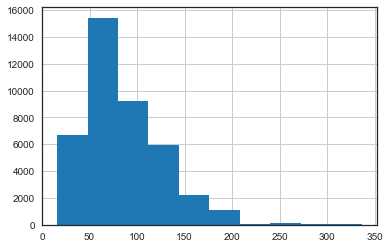

In [148]:
lead_parts1.num_totLead.hist()

85.62224143738824 85.62224143738824 75.94285714


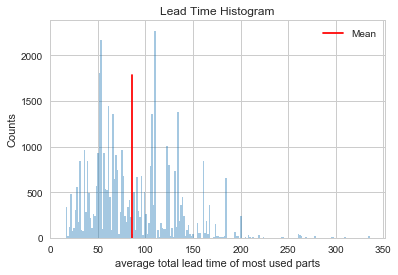

In [149]:
sns.set_context("notebook")
meanrat=lead_parts1.num_totLead.mean()
#you can get means and medians in different ways
print (meanrat, np.mean(lead_parts1.num_totLead), lead_parts1.num_totLead.median())
with sns.axes_style("whitegrid"):
    lead_parts1.num_totLead.hist(bins=202, alpha=0.4);
    plt.axvline(meanrat, 0, 0.75, color='r', label='Mean')
    plt.xlabel("average total lead time of most used parts")
    plt.ylabel("Counts")
    plt.title("Lead Time Histogram")
    plt.legend()
    #sns.despine()

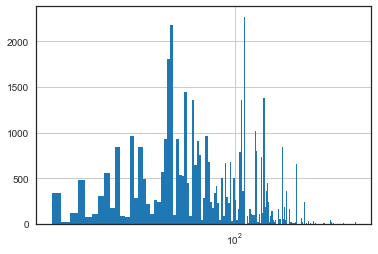

In [150]:
lead_parts1.num_totLead.hist(bins=202)
plt.xscale("log");

In [151]:
lead_parts1.describe()

,num_partCount,num_level,num_totLead,num_dimLead,num_inv,num_postProdLead,num_preProdLead,num_procLead,num_itemMatCost,num_stockInd,...,num_itemCost,num_onHand.1,num_onHandInv,num_openPOsTot,num_openSOsTot,num_soQty,num_soUnitCost,num_venLead,num_venPOQty,num_venPOPrice
count,40862.000000,40862.000000,40862.000000,40862.000000,4.086200e+04,40862.000000,40862.000000,40862.000000,4.086200e+04,40862.0,...,40862.0,40862.0,40862.0,40862.0,40862.0,40862.000000,4.086200e+04,40862.000000,40862.000000,4.086200e+04
mean,18.013558,1.639004,85.622241,168.262241,5.922289e+04,8.926520,1.000514,75.695207,8.944877e+04,0.0,...,0.0,0.0,0.0,0.0,0.0,4.847903,3.409599e+11,73.383539,6.908630,1.313022e+05
std,24.506144,1.082418,43.210547,159.717204,1.725313e+05,1.348579,0.029985,42.931114,2.470065e+05,0.0,...,0.0,0.0,0.0,0.0,0.0,45.142646,6.589716e+12,196.978824,75.913198,3.776304e+05
min,1.000000,1.000000,16.000000,-20.000000,0.000000e+00,5.000000,1.000000,5.000000,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,3.000000,1.000000,52.571429,81.700000,2.724533e+01,7.142857,1.000000,43.000000,4.060000e+01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.700000,4.344797e+01,34.062500,1.000000,1.013010e+02
50%,8.000000,1.000000,75.942857,160.462712,4.451895e+03,10.000000,1.000000,65.285714,6.167000e+03,0.0,...,0.0,0.0,0.0,0.0,0.0,0.888889,7.150575e+03,55.000000,1.076923,8.587096e+03
75%,19.000000,2.000000,110.000000,205.352941,2.051782e+04,10.000000,1.000000,99.000000,2.867400e+04,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,2.940745e+04,95.000000,1.833333,3.243392e+04
max,123.000000,8.000000,336.000000,1468.000000,3.285265e+06,10.000000,2.750000,325.000000,4.895586e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,1333.205882,5.000000e+14,13573.230000,1366.631579,6.563802e+06


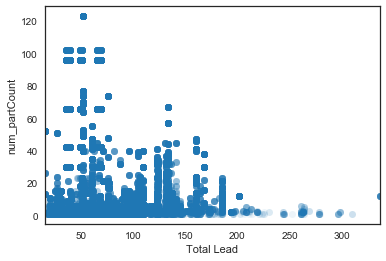

In [152]:
plt.scatter(lead_parts1.num_totLead, lead_parts1.num_partCount, lw=0, alpha=.08)
plt.xlim([16,336])
plt.xlabel("Total Lead")
plt.ylabel("num_partCount")

### Convert Nominal Data to Numeric

1) id_req

2) id_frame

3) id_task

4) id_partL1

In [153]:
lead_parts1.to_csv('lead_parts1.csv', index=False)
print('Done')

Done
